<a href="https://colab.research.google.com/github/rakeshsurampalli/smart_investment/blob/master/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:


import pandas as pd
from google.colab import files
from pandas import datetime
import matplotlib.pyplot as plt
import numpy 

from math import sqrt
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas import Series

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat



from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot

In [2]:
uploaded = files.upload()

Saving reliance1.csv to reliance1 (1).csv


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "reliance1.csv" with length 5062 bytes


In [4]:
import io
def parser(x):
  return datetime.strptime(x,'%d/%m/%y')

series = pd.read_csv(io.StringIO(uploaded['reliance1.csv'].decode('utf-8')),index_col=0,parse_dates=[0],date_parser=parser)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  This is separate from the ipykernel package so we can avoid doing imports until


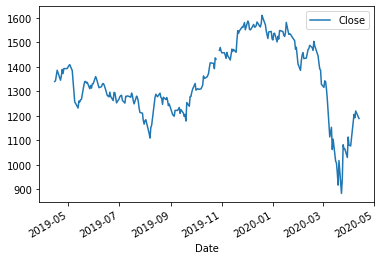

In [5]:
series.head()
series.plot()
pyplot.show()

In [6]:
series.head()
print("checking if any null values are present\n", series.isna().sum())

checking if any null values are present
 Close    1
dtype: int64


In [7]:
series = series.dropna()
print("checking if any null values are present\n", series.isna().sum())

checking if any null values are present
 Close    0
dtype: int64


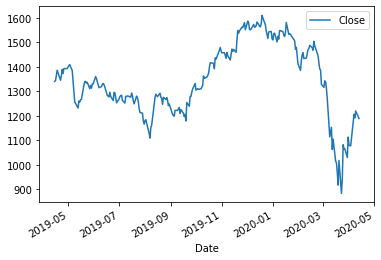

In [8]:
series.head()
series.plot()
pyplot.show()

In [0]:
X = series.values

train, test = X[0:-12], X[-12:]

In [0]:

from sklearn.metrics import mean_squared_error
# rmse = sqrt(mean_squared_error(test, predictions))
# print('RMSE: %.3f' % rmse)

RMSE: 65.076


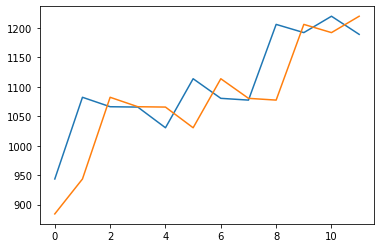

In [11]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

In [0]:

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

In [0]:
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 

In [0]:
X = series.values
supervised = timeseries_to_supervised(X, 1)
print(supervised.head())

             0            0
0     0.000000  1340.150024
1  1340.150024  1343.750000
2  1343.750000  1385.949951
3  1385.949951  1345.349976
4  1345.349976  1363.849976


In [0]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

In [0]:
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [0]:
#  differenced = difference(series, 1)
# # print(differenced.head())
# # invert transform
# inverted = list()
# for i in range(len(differenced)):
# 	value = inverse_difference(series, differenced[i], len(series)-i)
# 	inverted.append(value)
# inverted = Series(inverted)
# print(inverted.head())

In [0]:
from sklearn.preprocessing import MinMaxScaler
X = series.values
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_series = Series(scaled_X[:, 0])
print(scaled_series.head())

0    0.256647
1    0.266566
2    0.382835
3    0.270974
4    0.321945
dtype: float64


In [0]:

def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

In [0]:

def forecast(model, batch_size, row):
	X = row[0:-1]
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 

Month=1, Predicted=939.540709, Expected=943.400024
Month=2, Predicted=789.718026, Expected=1082.250000
Month=3, Predicted=1083.639015, Expected=1066.199951
Month=4, Predicted=1321.547882, Expected=1065.599976
Month=5, Predicted=1358.545155, Expected=1030.449951
Month=6, Predicted=1231.583909, Expected=1113.750000
Month=7, Predicted=1057.780999, Expected=1080.449951
Month=8, Predicted=1077.996034, Expected=1077.449951
Month=9, Predicted=1063.380328, Expected=1206.099976
Month=10, Predicted=1201.850003, Expected=1192.150024
Month=11, Predicted=1194.799803, Expected=1219.949951
Month=12, Predicted=1211.940744, Expected=1189.150024
Test RMSE: 156.808


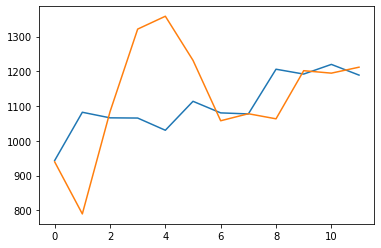

In [14]:
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
 
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:])
pyplot.plot(predictions)
pyplot.show()